### Part 3.2 - Model 1: Multi-Input Keras neural model (latest changes on 08.02.2020)

#### Import standard libraries

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from tabulate import tabulate
import re

import random

# Module to serialize the content produced from the execution of the code

import pickle

# Module to monitor the progress of a python for loop

from tqdm import tqdm_notebook

# Module to manipulate text in python - NLTK package

import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Module to compute word vectorizers and compute the cosine distance

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_distances

import string
import itertools

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:70% !important; }</style>"))

#### Import Tensorflow-Keras Libraries

In [2]:
%%time
from nltk.stem import WordNetLemmatizer

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

from time import time

#--------------------------------------------------------------

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#---------------------------------------------------------------

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from pylab import rcParams

import pydot
import pydotplus
import graphviz

from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
import json

# Import ML FLow
import mlflow.tensorflow
import mlflow.pyfunc
from tensorflow.keras import regularizers
import datetime

# Import TensorBoard
import tensorflow_docs as tfdocs
import tensorflow_docs.plots as tfplots
import tensorflow_docs.modeling as tfmodel
from tensorflow.keras import regularizers
# from tensorboard import default
# from tensorboard import program

import tensorflow_hub as hub
import bert
from bert import tokenization
from bert.tokenization import FullTokenizer

#Visualize Model

def visualize_model(model):
    return SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

from tensorflow.keras.utils import plot_model

from packaging import version

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TensorFlow version:  2.1.0
Version:  2.1.0
Eager mode:  True
Hub version:  0.7.0
GPU is NOT AVAILABLE
Wall time: 3.19 s


#### Import the data already tokenized and transformed from Part 3.1

* 80-20 split - Non-balanced data

In [58]:
X_train_seq_actors=np.load("C:\\Users\\spano\\Desktop\\GitHub-Thesis\\models_text_classification\\80-20 split_non-balanced\\x_train_seq_actors_80-20_non-balanced_07022020.npy")
X_train_seq_plot=np.load("C:\\Users\\spano\\Desktop\\GitHub-Thesis\\models_text_classification\\80-20 split_non-balanced\\x_train_seq_plot_80-20_non-balanced_07022020.npy")
X_train_seq_features=np.load("C:\\Users\\spano\\Desktop\\GitHub-Thesis\\models_text_classification\\80-20 split_non-balanced\\x_train_seq_features_80-20_non-balanced_07022020.npy")
X_train_seq_reviews=np.load("C:\\Users\\spano\\Desktop\\GitHub-Thesis\\models_text_classification\\80-20 split_non-balanced\\x_train_seq_reviews_80-20_non-balanced_07022020.npy")

print("X_train data inputs have been loaded!\n")

X_test_seq_actors=np.load("C:\\Users\\spano\\Desktop\\GitHub-Thesis\\models_text_classification\\80-20 split_non-balanced\\x_test_seq_actors_80-20_non-balanced_07022020.npy")
X_test_seq_plot=np.load("C:\\Users\\spano\\Desktop\\GitHub-Thesis\\models_text_classification\\80-20 split_non-balanced\\x_test_seq_plot_80-20_non-balanced_07022020.npy")
X_test_seq_features=np.load("C:\\Users\\spano\\Desktop\\GitHub-Thesis\\models_text_classification\\80-20 split_non-balanced\\x_test_seq_features_80-20_non-balanced_07022020.npy")
X_test_seq_reviews=np.load("C:\\Users\\spano\\Desktop\\GitHub-Thesis\\models_text_classification\\80-20 split_non-balanced\\x_test_seq_reviews_80-20_non-balanced_07022020.npy")

print("X_test data inputs have been loaded!\n")

y_train=np.load("C:\\Users\\spano\\Desktop\\GitHub-Thesis\\models_text_classification\\80-20 split_non-balanced\\y_train_80-20_non-balanced_07022020.npy")
y_test=np.load("C:\\Users\\spano\\Desktop\\GitHub-Thesis\\models_text_classification\\80-20 split_non-balanced\\y_test_80-20_non-balanced_07022020.npy")

print("y_train & y_test have been loaded!\n")

print("X_train_seq_actors shape:{}".format(X_train_seq_actors.shape))
print("X_train_seq_plot shape:{}".format(X_train_seq_plot.shape))
print("X_train_seq_features shape:{}".format(X_train_seq_features.shape))
print("X_train_seq_reviews shape:{}\n".format(X_train_seq_reviews.shape))

print("X_test_seq_actors shape:{}".format(X_test_seq_actors.shape))
print("X_test_seq_plot shape:{}".format(X_test_seq_plot.shape))
print("X_test_seq_features shape:{}".format(X_test_seq_features.shape))
print("X_test_seq_reviews shape:{}\n".format(X_test_seq_reviews.shape))

print("y_train shape:{}".format(y_train.shape))
print("y_test shape:{}".format(y_test.shape))

X_train data inputs have been loaded!

X_test data inputs have been loaded!

y_train & y_test have been loaded!

X_train_seq_actors shape:(39298, 17)
X_train_seq_plot shape:(39298, 23)
X_train_seq_features shape:(39298, 60)
X_train_seq_reviews shape:(39298, 2067)

X_test_seq_actors shape:(9825, 17)
X_test_seq_plot shape:(9825, 23)
X_test_seq_features shape:(9825, 60)
X_test_seq_reviews shape:(9825, 2067)

y_train shape:(39298, 17)
y_test shape:(9825, 17)


# <b>- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  </b>

#### ML-FLOW approach (contrary to TensorBoard) - <i> 15.01.2020 </i>

In [59]:
%load_ext tensorboard
# %reload_text tensorboard

logdir=".\\logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Callback function with early stopping to avodid overfit

class Callback_Configurations():
    
    MONITOR_METRIC = 'val_loss'
    MINIMUM_DELTA = 1
    PATIENCE = 10
    VERBOSE = 0
    MODE = 'min'
    
def callback(saved_model, model, logdir):
    
    weights_fname = '{}.h5'.format(saved_model)

    try:
        with open('{}.json'.format(save_model),'r') as f:
            model_json = json.load(f)
        
        model = model_from_json(model_json)
        
        model.load_weights('{}').format(weights_fname)

    except:
        print('\nPre-trained weights not found. Fitting from start')
        pass

    monitor_metric = Callback_Configurations.MONITOR_METRIC
    
    callbacks = [
        tfmodel.EpochDots(),
        
        EarlyStopping(monitor=monitor_metric,
                      min_delta=Callback_Configurations.MINIMUM_DELTA,
                      patience=Callback_Configurations.PATIENCE,
                      verbose=Callback_Configurations.VERBOSE,
                      mode=Callback_Configurations.MODE,
                      restore_best_weights=True),

        ModelCheckpoint(filepath=weights_fname,
                        monitor=monitor_metric,
                        verbose=Callback_Configurations.VERBOSE,
                        save_best_only=True,
                        save_weights_only=True), #True, False
        
        tf.keras.callbacks.TensorBoard(logdir)
        
]
    return callbacks

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Function to fit the keras multy input model

def fit_keras_multy_input(model, 
                          x_train_seq_actors, 
                          x_train_seq_plot, 
                          x_train_seq_features,
                          x_train_seq_reviews,
                          x_test_seq_actors, 
                          x_test_seq_plot, 
                          x_test_seq_features,
                          x_test_seq_reviews,
                          y_train, 
                          y_test,
                          callbacks,
                          steps_per_epoch,
                          epoch,
                          verbose_fit,
                          batch_size_fit):
    
    s = time()

    fit_model = model.fit([x_train_seq_actors, x_train_seq_plot, x_train_seq_features, x_train_seq_reviews], y_train,
                          steps_per_epoch = steps_per_epoch,
                          epochs=epoch,
                          verbose=verbose_fit,
                          batch_size=batch_size_fit,
                          validation_data=([x_test_seq_actors, x_test_seq_plot, x_test_seq_features, x_test_seq_reviews], y_test),
                          callbacks=callbacks) #(callbacks)

    duration = time() - s
    print("\nTraining time finished. Duration {} secs".format(duration))
    
    return fit_model

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

def save_model(model, model_name):
    
    model_json = model.to_json()

    with open("{}.json".format(model_name), "w") as json_file:
        json.dump(model_json, json_file)

    model.save_weights("{}.h5".format(model_name))
    
    print("\nModel's weights are saved")
    
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# function to plot the model metrics (deprecated)

def plot_model_metrics(fit_model):

    rcParams['figure.figsize'] = 12, 6

    plt.plot(fit_model.history['accuracy'] , 'g') # acc
    plt.plot(fit_model.history['val_accuracy'] , 'b') # val_acc
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid(True)
    plt.show()

    rcParams['figure.figsize'] = 12, 6

    plt.plot(fit_model.history['loss'] , 'g')
    plt.plot(fit_model.history['val_loss'] , 'b')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid(True)
    plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# alternative function to plot the model metrics (used)

def plot_keras_history(history): #where history =  model.fit()
    """
    
    :param history: 
    :return: 
    """
    # the history object gives the metrics keys. 
    # we will store the metrics keys that are from the training sesion.
    metrics_names = [key for key in history.history.keys() if not key.startswith('val_')]

    for i, metric in enumerate(metrics_names):
        
        # getting the training values
        metric_train_values = history.history.get(metric, [])
        
        # getting the validation values
        metric_val_values = history.history.get("val_{}".format(metric), [])

        # As loss always exists as a metric we use it to find the 
        epochs = range(1, len(metric_train_values) + 1)
        
        # leaving extra spaces to allign with the validation text
        training_text = "   Training {}: {:.5f}".format(metric,
                                                        metric_train_values[-1])

        # metric
        plt.figure(i, figsize=(12, 6))

        plt.plot(epochs,
                 metric_train_values,
                 'b',
                 label=training_text)
        
        # if we validation metric exists, then plot that as well
        if metric_val_values:
            validation_text = "Validation {}: {:.5f}".format(metric,
                                                             metric_val_values[-1])

            plt.plot(epochs,
                     metric_val_values,
                     'g',
                     label=validation_text)
        
        # add title, xlabel, ylabe, and legend
        plt.title('Model Metric: {}'.format(metric))
        plt.xlabel('Epochs')
        plt.ylabel(metric.title())
        plt.legend()
    
    fig1 = plt.gcf()
    #plt.savefig('multi-input-keras.png')
    plt.show()
    plt.draw()
    fig1.savefig('multi-input-keras.png', dpi=100)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Create function that will get as input a dataframe with the metrics (validation, accuracy) and create a plot per epoch
# Proposed modules: seaborn, plotly, matplolib.


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [89]:
# Neural Network Structure

neural_network_parameters = {}
optimizer_parameters = {}
fit_parameters = {}

neural_network_parameters['embedding_dimension'] = 50 #Grid-search on that value
neural_network_parameters['pool_size'] = None
neural_network_parameters['padding'] = 'valid'
neural_network_parameters['batch_size'] = 64 #Grid-search on that value
neural_network_parameters['l2_regularization'] = 0.01 #Grid-search on that value
neural_network_parameters['dropout_rate'] = 0.0 #Grid-search on that value
neural_network_parameters['dense_activation'] = 'relu'
neural_network_parameters['output_activation'] = 'sigmoid' #softmax, sigmoid
neural_network_parameters['number_target_variables'] = len(y_train[0].tolist())

#It’s important to notice, that we use a sigmoid activation function with a multiclass output-layer. 
#The sigmoid gives us independent propabilities for each class. So DON’T use softmax here!

neural_network_parameters['model_loss'] = 'binary_crossentropy' #sparse_categorical_crossentropy, binary_crossentropy, categorical_crossentropy
neural_network_parameters['model_metric'] = 'accuracy' #sparse_categorical_accuracy, accuracy

#--------------------------------------------------------------------------------------

fit_parameters["steps_per_epoch"] = len(X_train_seq_features)//neural_network_parameters['batch_size']
fit_parameters["epoch"] = 150
fit_parameters["verbose_fit"] = 0
fit_parameters["batch_size_fit"] = 64 #Grid-search on that value

#---------------------------------------------------------------------------------------

# Optimizer: ADAM (version_1)

optimizer_parameters['adam_learning_rate'] = 0.001
optimizer_parameters['adam_beta_1'] = 0.9
optimizer_parameters['adam_beta_2'] = 0.999
optimizer_parameters['adam_amsgrad'] = False

def optimizer_adam_v1():
    
    return keras.optimizers.Adam(learning_rate=optimizer_parameters['adam_learning_rate'], 
                                 beta_1=optimizer_parameters['adam_beta_1'], 
                                 beta_2=optimizer_parameters['adam_beta_2'], 
                                 amsgrad=optimizer_parameters['adam_amsgrad'])
#---------------------------------------------------------------------------------------

# Optimizer: ADAM (version_2)

# lr_schedule_learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# lr_schedule_decay_rate = [1, 2, 3, 4]

optimizer_parameters['steps_per_epoch'] = len(X_train_seq_features)//neural_network_parameters['batch_size']
# Steps per epoch...fine tune
optimizer_parameters['lr_schedule_learning_rate'] = 0.01 #Grid-search on that value
optimizer_parameters['lr_schedule_decay_steps'] = optimizer_parameters['steps_per_epoch']*1000
optimizer_parameters['lr_schedule_decay_rate'] = 1 #Grid-search on that value
optimizer_parameters['staircase'] = False

#STEPS_PER_EPOCH = len(X_train_seq_features)//neural_network_parameters['batch_size'] #(512 = BATCH SIZE)

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    optimizer_parameters['lr_schedule_learning_rate'],
    decay_steps=optimizer_parameters['lr_schedule_decay_steps'],
    decay_rate=optimizer_parameters['lr_schedule_decay_rate'],
    staircase=optimizer_parameters['staircase'])

def optimizer_adam_v2():
    
    return keras.optimizers.Adam(lr_schedule)
#---------------------------------------------------------------------------------------

# Optimizer: SDG (version 1)

optimizer_parameters['SGD_learning_rate'] = 0.01
optimizer_parameters['SGD_decay'] = 1e-6
optimizer_parameters['SGD_momentum'] = 0.9
optimizer_parameters['SGD_nesterov'] = True

def optimizer_SDG_v1():
    
    return keras.optimizers.SGD(lr=optimizer_parameters['SGD_learning_rate'],
                                decay=optimizer_parameters['SGD_decay'],
                                momentum=optimizer_parameters['SGD_momentum'],
                                nesterov=optimizer_parameters['SGD_nesterov'])

#---------------------------------------------------------------------------------------

In [ ]:
def keras_multy_classification_model_v4(maxlen_actors, maxlen_plot, maxlen_features, optimizer_version = None):
    
    sentenceLength_actors = maxlen_actors
    vocab_size_frequent_words_actors = 20001
    
    sentenceLength_plot = maxlen_plot
    vocab_size_frequent_words_plot = 17501
    
    sentenceLength_features = maxlen_features
    vocab_size_frequent_words_features = 20001
    
    sentenceLength_reviews = maxlen_reviews
    vocab_size_frequent_words_reviews = 40001
    
    model = keras.Sequential(name='MultyInput_Keras_Classification_model')
    
    actors = keras.Input(shape=(sentenceLength_actors,), name='actors_input')
    plot = keras.Input(shape=(sentenceLength_plot,), name='plot_input')
    features = keras.Input(shape=(sentenceLength_features,), name='features_input')
    reviews = keras.Input(shape=(sentenceLength_reviews,), name='reviews_input')
    
    emb1 = layers.Embedding(input_dim = vocab_size_frequent_words_actors + 1,
                            output_dim = neural_network_parameters['embedding_dimension'],
                            embeddings_initializer = 'uniform', 
                            mask_zero = False,
                            input_length = sentenceLength_actors,
                            name="actors_embedding_layer")(actors)
    
    encoded_layer1 = layers.GlobalMaxPooling1D(name="globalmaxpooling1")(emb1)
    
    emb2 = layers.Embedding(input_dim = vocab_size_frequent_words_plot + 1,
                            output_dim = neural_network_parameters['embedding_dimension'],
                            embeddings_initializer = 'uniform',
                            mask_zero = False,
                            input_length = sentenceLength_plot,
                            name="plot_embedding_layer")(plot)
    
    encoded_layer2 = layers.GlobalMaxPooling1D(name="globalmaxpooling2")(emb2)

    emb3 = layers.Embedding(input_dim = vocab_size_frequent_words_features + 1,
                            output_dim = neural_network_parameters['embedding_dimension'],
                            embeddings_initializer = 'uniform',
                            mask_zero = False,
                            input_length = sentenceLength_features,
                            name="features_embedding_layer")(features)
    
    encoded_layer3 = layers.GlobalMaxPooling1D(name="globalmaxpooling3")(emb3)
    
    emb4 = layers.Embedding(input_dim = vocab_size_frequent_words_reviews + 1,
                            output_dim = neural_network_parameters['embedding_dimension'],
                            embeddings_initializer = 'uniform',
                            mask_zero = False,
                            input_length = sentenceLength_reviews,
                            name="reviews_embedding_layer")(reviews)
    
    encoded_layer4 = layers.GlobalMaxPooling1D(name="globalmaxpooling4")(emb4)
    
    merged = layers.concatenate([encoded_layer1, encoded_layer2, encoded_layer3, encoded_layer4], axis=-1)

    dense_layer_1 = layers.Dense(neural_network_parameters['batch_size'], 
                                 kernel_regularizer=regularizers.l2(neural_network_parameters['l2_regularization']),
                                 activation=neural_network_parameters['dense_activation'],
                                 name="1st_dense_layer")(merged)
    layers.Dropout(neural_network_parameters['dropout_rate'])(dense_layer_1)
    
    dense_layer_2 = layers.Dense(neural_network_parameters['batch_size'], 
                                 kernel_regularizer=regularizers.l2(neural_network_parameters['l2_regularization']),
                                 activation=neural_network_parameters['dense_activation'],
                                 name='2nd_dense_layer')(dense_layer_1)
    layers.Dropout(neural_network_parameters['dropout_rate'])(dense_layer_2)
    
    output_layer = layers.Dense(neural_network_parameters['number_target_variables'], activation=neural_network_parameters['output_activation'],
                                name='output_layer')(dense_layer_2)
    
    model = keras.Model(inputs=[actors, plot, features, reviews], outputs=output_layer)
    
    print(model.output_shape)

    print(model.summary())
    
    # Version_1 of Adam
    if optimizer_version is None:
        
        optimizer = optimizer_adam_v1()
    
    model.compile(optimizer=optimizer,
                  loss=neural_network_parameters['model_loss'],
                  metrics=[neural_network_parameters['model_metric']])
    
    plot_model(model, to_file='multy_input_keras_model.png')
    
    return model

In [ ]:
def keras_multy_classification_model_v5(maxlen_actors, maxlen_plot, maxlen_features, maxlen_reviews, optimizer_version = None):
    
    sentenceLength_actors = maxlen_actors
    vocab_size_frequent_words_actors = 20001
    
    sentenceLength_plot = maxlen_plot
    vocab_size_frequent_words_plot = 17501
    
    sentenceLength_features = maxlen_features
    vocab_size_frequent_words_features = 20001
    
    sentenceLength_reviews = maxlen_reviews
    vocab_size_frequent_words_reviews = 40001
    
    model = keras.Sequential(name='MultyInput_Keras_Classification_model')
    
    actors = keras.Input(shape=(sentenceLength_actors,), name='actors_input')
    plot = keras.Input(shape=(sentenceLength_plot,), name='plot_input')
    features = keras.Input(shape=(sentenceLength_features,), name='features_input')
    reviews = keras.Input(shape=(sentenceLength_reviews,), name='reviews_input')
    
    emb1 = layers.Embedding(input_dim = vocab_size_frequent_words_actors + 1,
                            output_dim = neural_network_parameters['embedding_dimension'],
                            embeddings_initializer = 'uniform', 
                            mask_zero = True,
                            input_length = sentenceLength_actors,
                            name="actors_embedding_layer")(actors)
    
    encoded_layer1 = layers.GlobalMaxPooling1D(name="globalmaxpooling1")(emb1)
    
    emb2 = layers.Embedding(input_dim = vocab_size_frequent_words_plot + 1,
                            output_dim = neural_network_parameters['embedding_dimension'],
                            embeddings_initializer = 'uniform',
                            mask_zero = True,
                            input_length = sentenceLength_plot,
                            name="plot_embedding_layer")(plot)
    
    encoded_layer2 = layers.GlobalMaxPooling1D(name="globalmaxpooling2")(emb2)

    emb3 = layers.Embedding(input_dim = vocab_size_frequent_words_features + 1,
                            output_dim = neural_network_parameters['embedding_dimension'],
                            embeddings_initializer = 'uniform',
                            mask_zero = True,
                            input_length = sentenceLength_features,
                            name="features_embedding_layer")(features)
    
    encoded_layer3 = layers.GlobalMaxPooling1D(name="globalmaxpooling3")(emb3)
    
    emb4 = layers.Embedding(input_dim = vocab_size_frequent_words_reviews + 1,
                            output_dim = neural_network_parameters['embedding_dimension'],
                            embeddings_initializer = 'uniform',
                            mask_zero = True,
                            input_length = sentenceLength_reviews,
                            name="reviews_embedding_layer")(reviews)
    
    encoded_layer4 = layers.GlobalMaxPooling1D(name="globalmaxpooling4")(emb4) #2D for images
    
    merged = layers.concatenate([encoded_layer1, encoded_layer2, encoded_layer3, encoded_layer4], axis=-1)

    dense_layer_1 = layers.Dense(neural_network_parameters['batch_size'], 
                                 #kernel_regularizer=regularizers.l2(neural_network_parameters['l2_regularization']),
                                 activation=neural_network_parameters['dense_activation'],
                                 name="1st_dense_layer")(merged)
    
    dense_layer_2 = layers.Dense(neural_network_parameters['batch_size'], 
                                 #kernel_regularizer=regularizers.l2(neural_network_parameters['l2_regularization']),
                                 activation=neural_network_parameters['dense_activation'],
                                 name='2nd_dense_layer')(dense_layer_1)
    
    output_layer = layers.Dense(neural_network_parameters['number_target_variables'], activation=neural_network_parameters['output_activation'],
                                name='output_layer')(dense_layer_2)
    
    model = keras.Model(inputs=[actors, plot, features, reviews], outputs=output_layer)
    
    print(model.output_shape)

    print(model.summary())
    
    # Version_1 of Adam
    if optimizer_version is None:
        
        optimizer = optimizer_adam_v1()
    
    model.compile(optimizer=optimizer,
                  loss=neural_network_parameters['model_loss'],
                  metrics=[neural_network_parameters['model_metric']])
    
    plot_model(model, to_file='multy_input_keras_model.png')
    
    return model

In [92]:
def keras_multy_classification_model_v6(maxlen_actors, maxlen_plot, maxlen_features, maxlen_reviews, optimizer_version = None):
    
    sentenceLength_actors = maxlen_actors
    vocab_size_frequent_words_actors = 20001
    
    sentenceLength_plot = maxlen_plot
    vocab_size_frequent_words_plot = 17501
    
    sentenceLength_features = maxlen_features
    vocab_size_frequent_words_features = 20001
    
    sentenceLength_reviews = maxlen_reviews
    vocab_size_frequent_words_reviews = 40001
    
    model = keras.Sequential(name='MultyInput_Keras_Classification_model')
    
    actors = keras.Input(shape=(sentenceLength_actors,), name='actors_input')
    plot = keras.Input(shape=(sentenceLength_plot,), name='plot_input')
    features = keras.Input(shape=(sentenceLength_features,), name='features_input')
    reviews = keras.Input(shape=(sentenceLength_reviews,), name='reviews_input')
    
    emb1 = layers.Embedding(input_dim = vocab_size_frequent_words_actors + 1,
                            output_dim = neural_network_parameters['embedding_dimension'],
                            embeddings_initializer = 'uniform',
                            mask_zero = True,
                            input_length = sentenceLength_actors,
                            name="actors_embedding_layer")(actors)
    
    encoded_layer1 = layers.GlobalMaxPooling1D(name="globalmaxpooling1")(emb1)
    
    emb2 = layers.Embedding(input_dim = vocab_size_frequent_words_plot + 1,
                            output_dim = neural_network_parameters['embedding_dimension'],
                            embeddings_initializer = 'uniform',
                            mask_zero = True,
                            input_length = sentenceLength_plot,
                            name="plot_embedding_layer")(plot)
    
    encoded_layer2 = layers.GlobalMaxPooling1D(name="globalmaxpooling2")(emb2)

    emb3 = layers.Embedding(input_dim = vocab_size_frequent_words_features + 1,
                            output_dim = neural_network_parameters['embedding_dimension'],
                            embeddings_initializer = 'uniform',
                            mask_zero = True,
                            input_length = sentenceLength_features,
                            name="features_embedding_layer")(features)
    
    encoded_layer3 = layers.GlobalMaxPooling1D(name="globalmaxpooling3")(emb3)
    
    emb4 = layers.Embedding(input_dim = vocab_size_frequent_words_reviews + 1,
                            output_dim = neural_network_parameters['embedding_dimension'],
                            embeddings_initializer = 'uniform',
                            mask_zero = True,
                            input_length = sentenceLength_reviews,
                            name="reviews_embedding_layer")(reviews)
    
    encoded_layer4 = layers.GlobalMaxPooling1D(name="globalmaxpooling4")(emb4) #2D for images
    
    merged = layers.concatenate([encoded_layer1, encoded_layer2, encoded_layer3, encoded_layer4], axis=-1)

    dense_layer_1 = layers.Dense(neural_network_parameters['batch_size'], 
                                 kernel_regularizer=regularizers.l2(neural_network_parameters['l2_regularization']),
                                 activation=neural_network_parameters['dense_activation'],
                                 name="1st_dense_layer")(merged)
    layers.Dropout(neural_network_parameters['dropout_rate'])(dense_layer_1)
    
    output_layer = layers.Dense(neural_network_parameters['number_target_variables'], activation=neural_network_parameters['output_activation'],
                                name='output_layer')(dense_layer_1)
    
    model = keras.Model(inputs=[actors, plot, features, reviews], outputs=output_layer)
    
    print(model.output_shape)

    print(model.summary())
    
    # Version_1 of Adam
    if optimizer_version is None:
        
        optimizer = optimizer_adam_v2()
    
    model.compile(optimizer=optimizer,
                  loss=neural_network_parameters['model_loss'],
                  metrics=[neural_network_parameters['model_metric']])
    
    plot_model(model, to_file='multy_input_keras_model.png')
    
    return model

In [84]:
# BE CAREFUL...A TESTING APPROACH

# Grid Search Parameters

from sklearn.model_selection import GridSearchCV

neural_batch_size = [10, 20, 40, 60, 64, 80, 100, 128, 256, 512, 1024]
embedding_dimension = [25, 50, 100]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
l2_regularization = [0.001, 0.01, 0.1, 0.2, 0.3]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'] #embedding layer initializer

batch_size_fit = [10, 20, 40, 60, 64, 80, 100, 128, 256, 512, 1024]
lr_schedule_learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3] # How to grid search this?
lr_schedule_decay_rate = [1, 2, 3, 4] # How to grid search this?
 
param_grid = dict(neural_batch_size=neural_batch_size, 
                  embedding_dimension=embedding_dimension, 
                  dropout_rate=dropout_rate,
                  l2_regularization=l2_regularization, 
                  init_mode=init_mode, 
                  batch_size_fit=batch_size_fit,
                  lr_schedule_learning_rate=lr_schedule_learning_rate, 
                  lr_schedule_decay_rate=lr_schedule_decay_rate)
    
def keras_multy_classification_model_gridsearchCV(maxlen_actors, maxlen_plot, maxlen_features, maxlen_reviews,
                                                  neural_batch_size,
                                                  embedding_dimension,
                                                  dropout_rate,
                                                  l2_regularization,
                                                  init_mode,
                                                  lr_schedule_learning_rate,
                                                  lr_schedule_decay_rate,
                                                  optimizer_version=None):
    
    sentenceLength_actors = maxlen_actors
    vocab_size_frequent_words_actors = 20001
    
    sentenceLength_plot = maxlen_plot
    vocab_size_frequent_words_plot = 17501
    
    sentenceLength_features = maxlen_features
    vocab_size_frequent_words_features = 20001
    
    sentenceLength_reviews = maxlen_reviews
    vocab_size_frequent_words_reviews = 40001
    
    model = keras.Sequential(name='MultyInput_Keras_Classification_model')
    
    actors = keras.Input(shape=(sentenceLength_actors,), name='actors_input')
    plot = keras.Input(shape=(sentenceLength_plot,), name='plot_input')
    features = keras.Input(shape=(sentenceLength_features,), name='features_input')
    reviews = keras.Input(shape=(sentenceLength_reviews,), name='reviews_input')
    
    emb1 = layers.Embedding(input_dim = vocab_size_frequent_words_actors + 1,
                            output_dim = embedding_dimension, #neural_network_parameters['embedding_dimension']
                            embeddings_initializer = init_mode, #'uniform'
                            mask_zero = True,
                            input_length = sentenceLength_actors,
                            name="actors_embedding_layer")(actors)
    
    encoded_layer1 = layers.GlobalMaxPooling1D(name="globalmaxpooling1")(emb1)
    
    emb2 = layers.Embedding(input_dim = vocab_size_frequent_words_plot + 1,
                            output_dim = embedding_dimension, #neural_network_parameters['embedding_dimension']
                            embeddings_initializer = init_mode, #'uniform'
                            mask_zero = True,
                            input_length = sentenceLength_plot,
                            name="plot_embedding_layer")(plot)
    
    encoded_layer2 = layers.GlobalMaxPooling1D(name="globalmaxpooling2")(emb2)

    emb3 = layers.Embedding(input_dim = vocab_size_frequent_words_features + 1,
                            output_dim = embedding_dimension, #neural_network_parameters['embedding_dimension']
                            embeddings_initializer = init_mode, #'uniform'
                            mask_zero = True,
                            input_length = sentenceLength_features,
                            name="features_embedding_layer")(features)
    
    encoded_layer3 = layers.GlobalMaxPooling1D(name="globalmaxpooling3")(emb3)
    
    emb4 = layers.Embedding(input_dim = vocab_size_frequent_words_reviews + 1,
                            output_dim = embedding_dimension, #neural_network_parameters['embedding_dimension']
                            embeddings_initializer = init_mode, #'uniform'
                            mask_zero = True,
                            input_length = sentenceLength_reviews,
                            name="reviews_embedding_layer")(reviews)
    
    encoded_layer4 = layers.GlobalMaxPooling1D(name="globalmaxpooling4")(emb4) #2D for images
    
    merged = layers.concatenate([encoded_layer1, encoded_layer2, encoded_layer3, encoded_layer4], axis=-1)

    dense_layer_1 = layers.Dense(neural_batch_size, #neural_network_parameters['batch_size']
                                 kernel_regularizer=regularizers.l2(l2_regularization), #neural_network_parameters['l2_regularization']
                                 activation=neural_network_parameters['dense_activation'],
                                 name="1st_dense_layer")(merged)
    layers.Dropout(dropout_rate)(dense_layer_1) #neural_network_parameters['dropout_rate']
    
    output_layer = layers.Dense(neural_network_parameters['number_target_variables'], activation=neural_network_parameters['output_activation'],
                                name='output_layer')(dense_layer_1)
    
    model = keras.Model(inputs=[actors, plot, features, reviews], outputs=output_layer)
    
    print(model.output_shape)

    print(model.summary())
    
    if optimizer_version is None:
        
        optimizer = optimizer_adam_v2()
    
    model.compile(optimizer=optimizer,
                  loss=neural_network_parameters['model_loss'],
                  metrics=[neural_network_parameters['model_metric']])
    
    plot_model(model, to_file='multy_input_keras_model.png')
    
    return model

In [ ]:
print(X_train_seq_actors.shape)
print(type(X_train_seq_actors))

In [ ]:
print(X_train_seq_plot.shape)
print(type(X_train_seq_plot))

In [ ]:
print(X_train_seq_features.shape)
print(type(X_train_seq_features))

In [ ]:
print(X_train_seq_reviews.shape)
print(type(X_train_seq_reviews))

In [ ]:
print(y_train.shape)
print(type(y_train))

In [ ]:
print(y_test.shape)
print(type(y_test))

#### Prior to fitting the model: 

* X_train, X_test should have the form of an array with sequence of numbers.
* y_train, y_test should have the form of a multi-hot encoded dataframe.

<b> General observations: </b>

* Reducing batch size can produce a better model (I should grid search on batch size).
* Reducing the general number of parameters can produce better results.
* Removing the second dense layer improved the results.
* Removing regularization also affected the results.

(None, 17)
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
actors_input (InputLayer)       [(None, 17)]         0                                            
__________________________________________________________________________________________________
plot_input (InputLayer)         [(None, 23)]         0                                            
__________________________________________________________________________________________________
features_input (InputLayer)     [(None, 60)]         0                                            
__________________________________________________________________________________________________
reviews_input (InputLayer)      [(None, 2067)]       0                                            
_________________________________________________________________________________

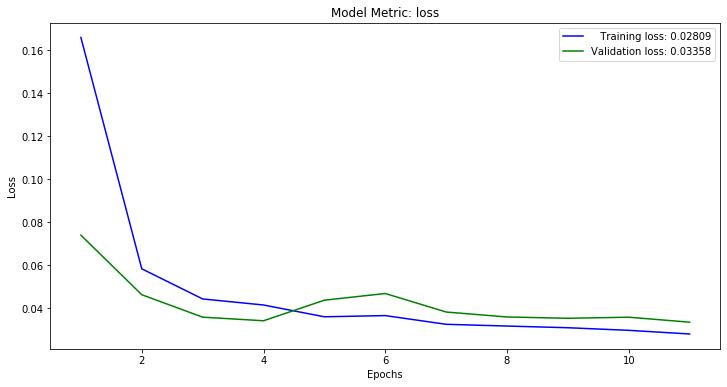

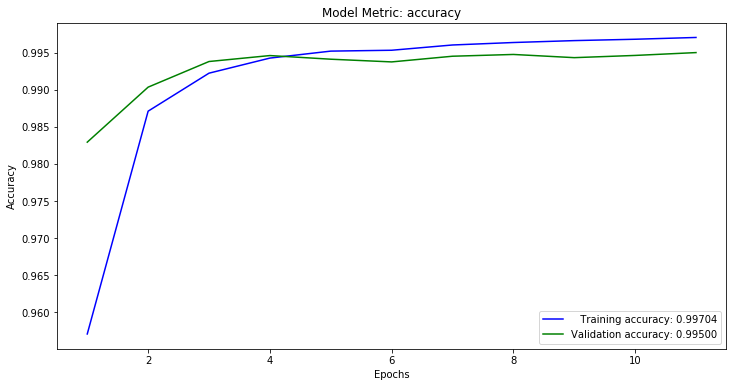

9825/9825 - 1s - loss: 0.0740 - accuracy: 0.9829

Test Score: 0.07403635839924558

Test Accuracy: 0.98292464


<Figure size 432x288 with 0 Axes>

In [94]:
# RUN MLFLOW program

model_repository = {}

model_repository['Multiple Input Model'] = keras_multy_classification_model_v6(X_train_seq_actors.shape[1], 
                                                                               X_train_seq_plot.shape[1], 
                                                                               X_train_seq_features.shape[1], 
                                                                               X_train_seq_reviews.shape[1], 
                                                                               optimizer_version = None)
with mlflow.start_run():
    
    model_directory = "C:\\Users\\spano\\Desktop\\GitHub-Thesis\\models_text_classification\\model_one"
    
    logdir = ".\\logs_test\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

    callbacks = callback("model_multy_input", model_repository['Multiple Input Model'], logdir)

    model_history = {}

    model_history['experiment'] = fit_keras_multy_input(model_repository['Multiple Input Model'], 
                                                        X_train_seq_actors, #input_1
                                                        X_train_seq_plot, #input_2
                                                        X_train_seq_features, #input_3
                                                        X_train_seq_reviews, #input4
                                                        X_test_seq_actors, 
                                                        X_test_seq_plot, 
                                                        X_test_seq_features,
                                                        X_test_seq_reviews,
                                                        y_train, #output
                                                        y_test, 
                                                        callbacks, #callback function
                                                        fit_parameters["steps_per_epoch"],
                                                        fit_parameters["epoch"],
                                                        fit_parameters["verbose_fit"],
                                                        fit_parameters["batch_size_fit"])

    hist = pd.DataFrame(model_history['experiment'].history)
    hist['epoch'] = model_history['experiment'].epoch
    hist['epoch']+= 1
    hist.index += 1
    print("\nTable of training the keras text classification model\n")
    print(tabulate(hist, headers='keys', tablefmt='psql'))
    
    hist.to_pickle(".\\model_one\\metrics_histogram_multi_input_keras.pkl")
    
    save_model(model_repository['Multiple Input Model'], "model_multy_input")
    
    #version_1 of plot model
    #plot_model_metrics(model_history['experiment'])
    
    #version_2 of plot model
    plot_keras_history(model_history['experiment'])
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

    model_evaluation = model_repository['Multiple Input Model'].evaluate([X_test_seq_actors, X_test_seq_plot, X_test_seq_features, X_test_seq_reviews], 
                                                                         y_test,
                                                                         batch_size=fit_parameters["batch_size_fit"],
                                                                         verbose=2)
    print('\nTest Score:', model_evaluation[0])

    print('\nTest Accuracy:', model_evaluation[1])
    
    #neural_model params
    mlflow.log_param("embedding_dimension", neural_network_parameters['embedding_dimension'] )
    mlflow.log_param("pool_size", neural_network_parameters['pool_size'])
    mlflow.log_param("padding", neural_network_parameters['padding'])
    mlflow.log_param("batch_size", neural_network_parameters['batch_size'])
    mlflow.log_param("l2_regularization", neural_network_parameters['l2_regularization'])
    mlflow.log_param("dropout_rate", neural_network_parameters['dropout_rate'])
    mlflow.log_param("dense_activation", neural_network_parameters['dense_activation'])
    mlflow.log_param("output_activation",neural_network_parameters['output_activation'])
    mlflow.log_param("model_loss",neural_network_parameters['model_loss']) #takes any data type
    mlflow.log_param("model_metric",neural_network_parameters['model_metric'])
    
    #optimizer params
    mlflow.log_param("lr_schedule_learning_rate",optimizer_parameters['lr_schedule_learning_rate'])
    mlflow.log_param("lr_schedule_decay_steps",optimizer_parameters['lr_schedule_decay_steps'])
    mlflow.log_param("lr_schedule_decay_rate",optimizer_parameters['lr_schedule_decay_rate'])
    mlflow.log_param("adam_amsgrad",optimizer_parameters['staircase'])
    
    #fit_model params
    mlflow.log_param("steps_per_epoch",fit_parameters['steps_per_epoch'])
    mlflow.log_param("fit_epoch",fit_parameters['epoch'])
    mlflow.log_param("verbose_fit",fit_parameters['verbose_fit'])
    mlflow.log_param("batch_size_fit",fit_parameters['batch_size_fit']) #in generl batch_size_fit = neurons batch size
    
    #logging the model metrics
    mlflow.log_metric("model_validation_loss",model_evaluation[0]) #take only floats/integers
    mlflow.log_metric("model_validation_accuracy",model_evaluation[1])
    
    #mlflow.keras.save_model(model_repository['Multiple Input Model'], model_directory) -> deprecated
    mlflow.keras.log_model(model_repository['Multiple Input Model'], "keras-model-v6")

    #mlflow.tensorflow.log_model(tf_saved_model_dir = "C:\\Users\\spano\\Desktop\\GitHub-Thesis\\models_text_classification\\model_one\\model_multy_input.h5")
#     mlflow.tensorflow.save_model(model_repository['Multiple Input Model'], model_directory)

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<b> Model prediction </b>

A good practice is to save the model predictions, to reproduce the classification report and compare it to other models

In [95]:
# Use to yield probability distribution over the categories
y_test_pred_probs = model_repository['Multiple Input Model'].predict([X_test_seq_actors, X_test_seq_plot, X_test_seq_features, X_test_seq_reviews])
y_test_pred_probs[0]

# y_predicted probabilities for each class

array([5.20055510e-05, 6.43491885e-03, 7.56604085e-03, 1.46603968e-04,
       4.09325445e-03, 1.08695842e-01, 3.11477022e-04, 3.52195860e-03,
       1.86906417e-03, 9.90697682e-01, 7.13763386e-03, 7.88883746e-01,
       5.38973138e-04, 1.05217646e-03, 1.09881386e-01, 1.44818146e-03,
       6.39846772e-02], dtype=float32)

In [96]:
y_test_predictions = (y_test_pred_probs>0.5).astype(int)

In [97]:
y_test_predictions[0]
# y_predicted genre if equals to 1 (predicted genres of the movie)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [98]:
y_test[0]
# the real genres of the movies

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [108]:
np.save(".//model_one//y_predictions_80-20_non-balanced_08022020", y_test_predictions)
np.save(".//model_one//y_true_80-20_non-balanced_07022020", y_test)

In [99]:
from sklearn.metrics import confusion_matrix, classification_report

classification_report= classification_report(y_true=y_test,
                                             y_pred=y_test_predictions)
print(classification_report)

c:\users\spano\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\spano\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1363
           1       0.51      0.23      0.31       774
           2       0.68      0.20      0.30       415
           3       0.97      0.58      0.72       438
           4       1.00      1.00      1.00      2835
           5       0.92      1.00      0.96       988
           6       0.99      0.98      0.98       782
           7       1.00      1.00      1.00      4553
           8       0.25      0.02      0.04       398
           9       0.98      0.99      0.99      1020
          10       0.00      0.00      0.00       205
          11       0.96      0.80      0.87       502
          12       0.97      1.00      0.99      1201
          13       0.99      0.97      0.98       552
          14       0.99      1.00      1.00      1270
          15       0.71      0.49      0.58       332
          16       0.00      0.00      0.00       263

   micro avg       0.97   

#### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Metrics Dataframe

In [101]:
df_scores = pd.DataFrame({'Keras Model':pd.Series(['Multiple Inputs Model'], dtype='str'),
                         'Test Loss':pd.Series([model_evaluation[0]], dtype='float'),
                         'Test Accuracy':pd.Series([model_evaluation[1]], dtype='float')})

df_scores.to_pickle(".\\model_one\\multy_input_keras_08022020.pkl")

df_scores

,Keras Model,Test Loss,Test Accuracy
0,Multiple Inputs Model,0.074036,0.982925


#### Predicted vs Actual Genre Tags

In [102]:
def predict_genre_tags(indx, model, genres_list):
        
    test_sequence_actors = X_test_seq_actors[indx:indx+1]
    
    test_sequence_plot = X_test_seq_plot[indx:indx+1]
    
    test_sequence_features = X_test_seq_features[indx:indx+1]
    
    test_sequence_reviews = X_test_seq_reviews[indx:indx+1]
    
    text_prediction = model.predict([test_sequence_actors, test_sequence_plot, test_sequence_features, test_sequence_reviews])
    
    [float(i) for i in text_prediction[0]]
    
    tag_probabilities = text_prediction[0][np.argsort(text_prediction[0])[-3:]]
    
    indexes = np.argsort(text_prediction[0])[::-1][:3]

    predicted_tags = []
    
    for i, tag in enumerate(genres_list):
        if i in indexes:
            predicted_tags.append(genres_list[i])
    
    return predicted_tags

In [103]:
random_numbers = random.sample(range(1, y_test.shape[0]), 5)

save_index_of_numbers = random_numbers

print("Randomly saved numbers to make predictions: {}".format(save_index_of_numbers))

with open('genres_list_08022020.pkl', 'rb') as handle:
    genres_list = pickle.load(handle)

Randomly saved numbers to make predictions: [4317, 8798, 7846, 3968, 2410]


In [104]:
X_test=pd.read_pickle("C:\\Users\\spano\\Desktop\\GitHub-Thesis\\models_text_classification\\80-20 split_non-balanced\\x_test_08022020.pkl")

In [105]:
df_predictions = pd.DataFrame({'Movie Title':pd.Series([X_test['title'].iloc[save_index_of_numbers[0]]], dtype='str'),
                               'Predicted Genre tags':pd.Series([predict_genre_tags(save_index_of_numbers[0], model_repository['Multiple Input Model'], genres_list)], dtype='str'),
                               'Real Genre tags':pd.Series([X_test['reduced_genres'].iloc[save_index_of_numbers[0]]], dtype='str')})

for i in range(len(save_index_of_numbers)):

    df_predictions = df_predictions.append({'Movie Title':X_test['title'].iloc[save_index_of_numbers[i]], 
                                            'Predicted Genre tags':predict_genre_tags(save_index_of_numbers[i], model_repository['Multiple Input Model'], genres_list),
                                            'Real Genre tags':X_test['reduced_genres'].iloc[save_index_of_numbers[i]]} , ignore_index=True)

df_predictions = df_predictions.drop(df_predictions.index[0])

In [106]:
df_predictions

,Movie Title,Predicted Genre tags,Real Genre tags
1,"Winning of Barbara Worth, The","[Drama, Musical, Romance]","[Drama, Romance, Western]"
2,The Last Witch Hunter,"[Action, Adventure, Animation]","[Action, Adventure, Fantasy]"
3,"Loving Story, The","[Documentary, Musical, War]",[Documentary]
4,Commune,"[Documentary, Musical, War]",[Documentary]
5,Faster Pussycat! Kill! Kill!,"[Action, Crime, Drama]","[Action, Crime, Drama]"


<b>- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  </b>